In [3]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras. import MaxPool2D
from tensorflow.keras.layelayersrs import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [7]:
x_train[0].shape

(28, 28, 1)

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

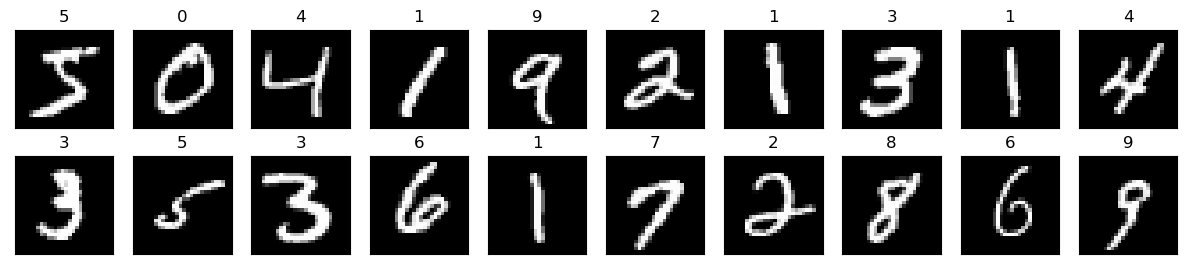

In [9]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')   
    ax.set_title(y_train[i])

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 34s 76ms/step - loss: 0.2468 - accuracy: 0.9229 - val_loss: 0.0571 - val_accuracy: 0.9835
Epoch 2/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 3/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 4/10
422/422 [==============================] - 31s 75ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.0281 - val_accuracy: 0.9923
Epoch 5/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0408 - accuracy: 0.9866 - val_loss: 0.0249 - val_accuracy: 0.9940
Epoch 6/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 7/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0286 - val_accuracy:

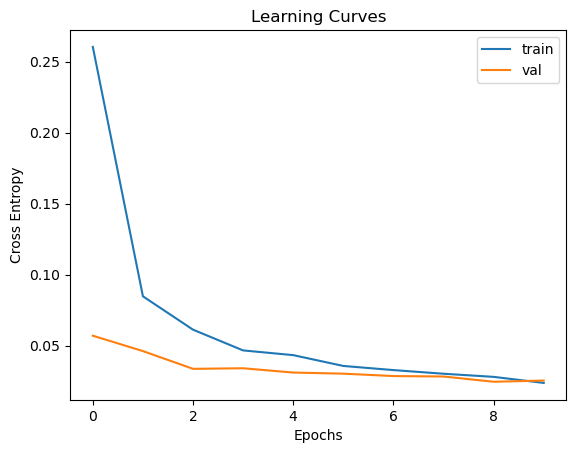

In [23]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [24]:

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy*100}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0217 - accuracy: 0.9932
Accuracy: 99.32000041007996


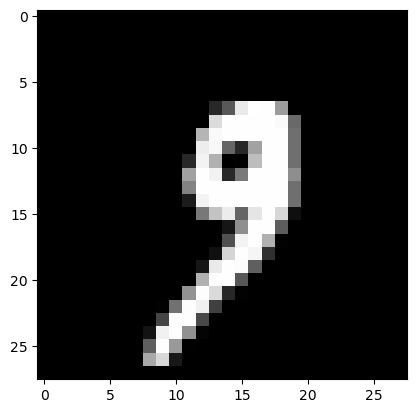

In [25]:
image = x_test[1000]
plt.imshow(np.squeeze(image), cmap='gray')

In [26]:
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)))

1/1 [==============================] - 0s 204ms/step
Predicted: 9


In [28]:
yhat

array([[1.4991998e-07, 4.6318948e-07, 1.9313564e-09, 6.0086491e-05,
        8.7685169e-07, 7.6038341e-05, 3.2398280e-09, 8.5680704e-06,
        1.5821217e-06, 9.9985230e-01]], dtype=float32)